In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from simpledbf import Dbf5
# pip3 install simpledbf (included in environment.yaml)

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


# Weighting function

In [38]:
def weighting_old(distance = 1):

    resolution = 100;
    width = 0.5
    rng = range(-distance,distance+1)
    df = pd.DataFrame(index=rng, columns=rng)

    for x in rng:
        for y in rng:
            count = 0
            for xi in range(resolution):
                for yi in range(resolution):
                    dist = math.sqrt(((x-0.5)+(xi+0.5)/resolution)**2 + ((y-0.5)+(yi+0.5)/resolution)**2)
                    if (distance - width < dist) & (dist < distance + width):
                        count += 1 / (resolution**2)
            df.loc[x, y] = count
            
    return(df)

In [112]:
def weighting(radius = 1):

    width = 0.5
    
    resolution = 20
    step = 1/resolution
    
    rng = range(-radius-1,radius+2)
    df = pd.DataFrame(index=rng, columns=rng)

    for x in rng:
        for y in rng:
            count = 0
            for x0 in np.arange(-0.5, 0.5, step):
                for y0 in np.arange(-0.5, 0.5, step):
                    for x1 in np.arange(x-0.5, x+0.5, step):
                        for y1 in np.arange(y-0.5, y+0.5, step):
                            distance = math.sqrt((x1-x0)**2 + (y1-y0)**2)
                            if (radius - width <= distance) & (distance < radius + width):
                                count += 1 / resolution**4
            df.loc[x, y] = count
            
    return(df)

In [102]:
weights0 = weighting(0)
weights0

,-1,0,1
-1,0.008125,0.068375,0.008094
0,0.068375,0.4864,0.064825
1,0.008094,0.064825,0.007525


In [103]:
weights1 = weighting(1)
weights1

,-2,-1,0,1,2
-2,0.000006,0.027937,0.095737,0.027937,0.000006
-1,0.027937,0.512169,0.770412,0.50985,0.028206
0,0.095737,0.770412,0.5136,0.772437,0.095737
1,0.027937,0.50985,0.772437,0.509219,0.027937
2,0.000006,0.028206,0.095737,0.027937,0.000006


In [104]:
weights2 = weighting(2)
weights2

,-3,-2,-1,0,1,2,3
-3,0,0.001037,0.0463,0.10395,0.0463,0.001037,0
-2,0.001037,0.194231,0.67145,0.755562,0.671325,0.194231,0.001037
-1,0.0463,0.67145,0.477644,0.161213,0.479994,0.671244,0.046787
0,0.10395,0.755562,0.161213,0,0.162738,0.755562,0.1052
1,0.0463,0.671325,0.479994,0.162738,0.481194,0.671325,0.046737
2,0.001037,0.194231,0.671244,0.755562,0.671325,0.194231,0.001037
3,0,0.001037,0.046787,0.1052,0.046737,0.001037,0


In [105]:
weights3 = weighting(3)
weights3

,-4,-3,-2,-1,0,1,2,3,4
-4,0,0,0.004256,0.060881,0.10785,0.060881,0.004256,0,0
-3,0,0.029669,0.375894,0.718837,0.7527,0.718837,0.375894,0.029669,0
-2,0.004256,0.375894,0.747844,0.300594,0.1487,0.300719,0.747844,0.376744,0.004256
-1,0.060881,0.718837,0.300594,0.002062,0,0.002062,0.300531,0.71835,0.060881
0,0.10785,0.7527,0.1487,0,0,0,0.1487,0.7527,0.108725
1,0.060881,0.718837,0.300719,0.002062,0,0.002062,0.300719,0.7184,0.060881
2,0.004256,0.375894,0.747844,0.300531,0.1487,0.300719,0.747844,0.377244,0.004256
3,0,0.029669,0.376744,0.71835,0.7527,0.7184,0.377244,0.029994,0
4,0,0,0.004256,0.060881,0.108725,0.060881,0.004256,0,0


In [106]:
(weights0+0*weights3).fillna(0) + (weights1+0*weights3).fillna(0) + (weights2+0*weights3).fillna(0) + weights3

,-4,-3,-2,-1,0,1,2,3,4
-4,0.0,0.0,0.004256,0.060881,0.10785,0.060881,0.004256,0.0,0.0
-3,0.0,0.029669,0.376931,0.765137,0.85665,0.765137,0.376931,0.029669,0.0
-2,0.004256,0.376931,0.942081,0.999981,1.0,0.999981,0.942081,0.377781,0.004256
-1,0.060881,0.765137,0.999981,1.0,1.0,1.0,0.999981,0.765137,0.060881
0,0.10785,0.85665,1.0,1.0,1.0,1.0,1.0,0.8579,0.108725
1,0.060881,0.765137,0.999981,1.0,1.0,1.0,0.999981,0.765137,0.060881
2,0.004256,0.376931,0.942081,0.999981,1.0,0.999981,0.942081,0.378281,0.004256
3,0.0,0.029669,0.377781,0.765137,0.8579,0.765137,0.378281,0.029994,0.0
4,0.0,0.0,0.004256,0.060881,0.108725,0.060881,0.004256,0.0,0.0


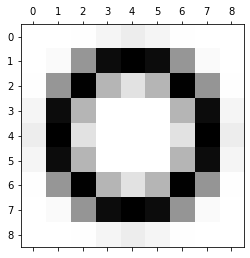

In [107]:
cmap=plt.get_cmap('Greys')
plt.matshow(weights3.astype(float), cmap = cmap)

# Read and prepare data
https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/population-distribution-demography/geostat

In [6]:
# Read and display size + head
dbf = Dbf5('../data/JRC_POPULATION_2018.dbf')
df_raw = dbf.to_dataframe()
print(df_raw.size)
df_raw.head(10)

21749679


,OBJECTID,GRD_ID,CNTR_ID,TOT_P_2018,Country,Date,Method,Shape_Leng,Shape_Area
0,1,CRS3035RES1000mN1000000E1966000,ES,103,ES,2018-01-01,Aggregation from fine grid cells,4000.0,1000000.0
1,2,CRS3035RES1000mN1000000E1967000,ES,0,NaN,NaN,NaN,4000.0,1000000.0
2,3,CRS3035RES1000mN1000000E1979000,ES,0,NaN,NaN,NaN,4000.0,1000000.0
3,4,CRS3035RES1000mN1000000E1980000,ES,276,ES,2018-01-01,Aggregation from fine grid cells,4000.0,1000000.0
4,5,CRS3035RES1000mN1000000E1981000,ES,1693,ES,2018-01-01,Aggregation from fine grid cells,4000.0,1000000.0
5,6,CRS3035RES1000mN1000000E1982000,ES,89,ES,2018-01-01,Aggregation from fine grid cells,4000.0,1000000.0
6,7,CRS3035RES1000mN1001000E1966000,ES,0,NaN,NaN,NaN,4000.0,1000000.0
7,8,CRS3035RES1000mN1001000E1973000,ES,0,NaN,NaN,NaN,4000.0,1000000.0
8,9,CRS3035RES1000mN1001000E1980000,ES,0,NaN,NaN,NaN,4000.0,1000000.0
9,10,CRS3035RES1000mN1001000E1981000,ES,7608,ES,2018-01-01,Aggregation from fine grid cells,4000.0,1000000.0


In [7]:
# Every grid ID is unique:
df_raw.groupby('GRD_ID')['OBJECTID'].count().sort_values()

GRD_ID
CRS3035RES1000mN1000000E1966000    1
CRS3035RES1000mN3283000E3365000    1
CRS3035RES1000mN3283000E3366000    1
CRS3035RES1000mN3283000E3406000    1
CRS3035RES1000mN3283000E3407000    1
                                  ..
CRS3035RES1000mN2619000E4227000    1
CRS3035RES1000mN2619000E4228000    1
CRS3035RES1000mN2619000E4230000    1
CRS3035RES1000mN2619000E4147000    1
CRS3035RES1000mN999000E1983000     1
Name: OBJECTID, Length: 2416631, dtype: int64

In [8]:
# Encode GRD_ID + select Population und Country
df = df_raw.copy()
df[['N', 'E']] = df["GRD_ID"].str.split("N", n = 1, expand = True)[1].str.split("E", n = 1, expand = True).astype(int)
df = df.set_index(['N', 'E'])
df = df[['TOT_P_2018', 'CNTR_ID']]
df.columns = ['Population', 'Country']
df.head()

Population Country
N       E                          
1000000 1966000         103      ES
        1967000           0      ES
        1979000           0      ES
        1980000         276      ES
        1981000        1693      ES

In [9]:
# Focus on Germany first
df = df[df['Country']=='DE']

In [10]:
# Double-check overall poluation
df['Population'].sum()/1000000

81.596615

# Visualization

In [11]:
colors = df.copy()
colors['color'] = 'lightgray'
colors.loc[colors['Population'] > 0,'color'] = 'darkgreen'
colors.loc[colors['Population'] > 50,'color'] = 'yellowgreen'
colors.loc[colors['Population'] > 100,'color'] = 'orange'
colors.loc[colors['Population'] > 500,'color'] = 'red'
colors.head()

Population Country      color
N       E                                     
2689000 4341000           7      DE  darkgreen
2690000 4341000           3      DE  darkgreen
2691000 4340000           3      DE  darkgreen
        4341000          22      DE  darkgreen
2692000 4340000           0      DE  lightgray

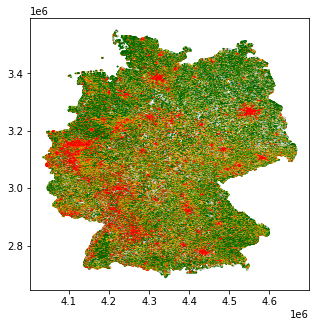

In [12]:
fig = plt.figure(figsize = [5,5])
plt.scatter(colors.index.get_level_values('E'), colors.index.get_level_values('N'), s = 0.4, c = colors['color'])

# Alternative way of plotting (requires slightly adjusted data format)
#cmap=plt.get_cmap('Greys')
#plt.matshow(test.astype(float), cmap = cmap)

# Calculating number of households near a raster field  

In [13]:
test = pd.DataFrame(
    data = np.ones([5,5]),
    index = ['a','b','c','d','e'], 
    columns = [1,2,3,4,5]
)

test.loc['a',1] = 10
test

,1,2,3,4,5
a,10.0,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0,1.0
e,1.0,1.0,1.0,1.0,1.0


In [14]:
test

,1,2,3,4,5
a,10.0,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0,1.0
e,1.0,1.0,1.0,1.0,1.0


In [15]:
def shift_from(y, x, df):
    
    def from_x(x, df):
        if x < 0:
            return(df.columns[:x])
        else:
            return(df.columns[x:])
    
    def from_y(y, df):
        if y < 0:
            return(df.index[:y])
        else:
            return(df.index[y:])

    return(df.loc[from_y(y, df), from_x(x, df)])

def to_x(x, df):
    if x <= 0:
        return(df.columns[-x:])
    else:
        return(df.columns[:-x])
    
def to_y(y, df):
    if y <= 0:
        return(df.index[-y:])
    else:
        return(df.index[:-y])

In [16]:
def habitants_in_range(dfi, distance = 1):
    weights = weighting(distance)

    dfo = pd.DataFrame(0, index = dfi.index, columns = dfi.columns)

    for x in weights.columns:
        for y in weights.index:
            dfo.loc[to_y(y, dfo), to_x(x, dfo)] += shift_from(y, x, dfi).values * weights.loc[y, x]
    
    return(dfo)

In [24]:
test_range_1 = habitants_in_range(test, 1)
test_range_1

,1,2,3,4,5
a,4.6290,12.9664,4.2202,4.2202,2.7030
b,12.9664,11.1914,6.2828,6.2828,4.2202
c,4.2202,6.2828,6.2828,6.2828,4.2202
d,4.2202,6.2828,6.2828,6.2828,4.2202
e,2.7030,4.2202,4.2202,4.2202,2.7030


E,4035000,4036000,4037000,4038000,4039000,4040000,4041000,4042000,4043000,4044000,...,4659000,4660000,4661000,4662000,4663000,4664000,4665000,4666000,4667000,4668000
N,,,,,,,,,,,,,,,,,,,,,
2689000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2690000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2691000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2692000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2693000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3547000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3548000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
range_1 = habitants_in_range(df['Population'].unstack().sort_index().sort_index(axis=1), 1)

In [26]:
colors = pd.DataFrame()
colors['Population'] = range_1.copy().stack()
colors['color'] = 'lightgray'
colors.loc[colors['Population'] > 0,'color'] = 'darkgreen'
colors.loc[colors['Population'] > 50,'color'] = 'yellowgreen'
colors.loc[colors['Population'] > 100,'color'] = 'orange'
colors.loc[colors['Population'] > 500,'color'] = 'red'
colors.head()

Population color
N       E                        
2699000 4341000   5263.6868   red
        4342000   4233.3800   red
2700000 4339000    611.6244   red
        4340000   2461.8104   red
        4341000   4825.8510   red

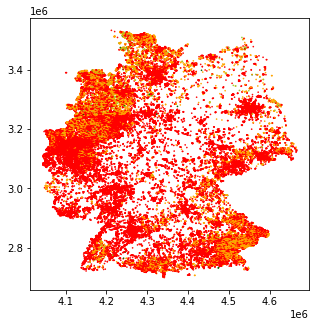

In [27]:
fig = plt.figure(figsize = [5,5])
plt.scatter(colors.index.get_level_values('E'), colors.index.get_level_values('N'), s = 0.4, c = colors['color'])

# Alternative way of plotting (requires slightly adjusted data format)
#cmap=plt.get_cmap('Greys')
#plt.matshow(test.astype(float), cmap = cmap)